### Imports

We will use the standard data science and machine learning libraries: numpy, pandas, and scikit-learn. We also use matplotlib and seaborn for visualization.

In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Data Cleaning and Formatting

### Load in the Data and Examine

In [4]:
# Training data
perf_train = pd.read_csv('performance_train.csv')
print(' data shape: ', perf_train.shape)
perf_train.head()

Training data shape:  (11900, 3)


,ID_CPTE,PERIODID_MY,Default
0,99690111,2015-12-01,0
1,57427180,2012-12-01,0
2,29617912,2015-12-01,0
3,61632809,2015-12-01,0
4,14117855,2013-12-01,0


In [5]:
# Testing data features
perf_test = pd.read_csv('performance_test.csv')
print('Testing data shape: ', perf_test.shape)
perf_test.head(50)

Testing data shape:  (5100, 3)


,ID_CPTE,PERIODID_MY,Default
0,71424379,2014-12-01,NaN
1,64887111,2015-12-01,NaN
2,69431075,2014-12-01,NaN
3,31823308,2016-12-01,NaN
4,39407834,2012-12-01,NaN
5,94576690,2015-12-01,NaN
6,35602796,2014-12-01,NaN
7,94837853,2014-12-01,NaN
8,84623445,2014-12-01,NaN
9,62980143,2016-12-01,NaN


### Examine the Distribution of the Default Column

In [6]:
perf_train['Default'].value_counts()

0    9599
1    2301
Name: Default, dtype: int64

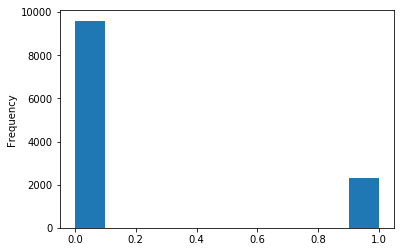

In [7]:
perf_train['Default'].astype(int).plot.hist();

### Data Types and Missing Values

The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Already from looking at the dataframe, there might be a problem because the missing values are coded as "Not Available" rather than as np.nan (not a number). This means the columns with numbers will not be represented as numeric because pandas converts columns with any strings values into columns of all strings.

In [8]:
# See the column data types and non-missing values
perf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 3 columns):
ID_CPTE        11900 non-null int64
PERIODID_MY    11900 non-null object
Default        11900 non-null int64
dtypes: int64(2), object(1)
memory usage: 279.0+ KB


### Missing Values

Now that we have the correct column datatypes, we can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. As with many tasks in data science, I did not write this function myself, but rather found it online in a Stack Overflow forum!

In [9]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
# Missing values statistics
missing_values = missing_values_table(perf_train)
missing_values.head(20)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [11]:
# Missing values statistics
missing_values = missing_values_table(perf_test)
missing_values.head(20)

Your selected dataframe has 3 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Default,5100,100.0


### Column Types

In [12]:
# Number of each type of column
perf_train.dtypes.value_counts()

int64     2
object    1
dtype: int64

In [13]:
# Number of unique classes in each object column
perf_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

PERIODID_MY    5
dtype: int64

### Encoding Categorical Variables

In [14]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in perf_train:
    if perf_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(perf_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(perf_train[col])
            # Transform both training and testing data
            perf_train[col] = le.transform(perf_train[col])
            perf_test[col] = le.transform(perf_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [15]:
# one-hot encoding of categorical variables
perf_train = pd.get_dummies(perf_train)
perf_test = pd.get_dummies(perf_test)

print('Training Features shape: ', perf_train.shape)
print('Testing Features shape: ', perf_test.shape)

Training Features shape:  (11900, 7)
Testing Features shape:  (5100, 7)


In [16]:
perf_train.head(10)

,ID_CPTE,Default,PERIODID_MY_2012-12-01,PERIODID_MY_2013-12-01,PERIODID_MY_2014-12-01,PERIODID_MY_2015-12-01,PERIODID_MY_2016-12-01
0,99690111,0,0,0,0,1,0
1,57427180,0,1,0,0,0,0
2,29617912,0,0,0,0,1,0
3,61632809,0,0,0,0,1,0
4,14117855,0,0,1,0,0,0
5,23700394,0,0,1,0,0,0
6,27881705,0,1,0,0,0,0
7,46100731,0,1,0,0,0,0
8,58512689,0,0,0,1,0,0
9,24661392,0,0,0,0,0,1


### Aligning Training and Testing Data

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!



In [17]:
train_labels = perf_train['Default']

# Align the training and testing data, keep only columns present in both dataframes
perf_train, perf_test = perf_train.align(perf_test, join = 'inner', axis = 1)

# Add the target back in
perf_train['Default'] = train_labels

print('Training Features shape: ', perf_train.shape)
print('Testing Features shape: ', perf_test.shape)

Training Features shape:  (11900, 7)
Testing Features shape:  (5100, 7)


In [18]:
plt.figure(figsize = (10, 8))
# KDE plot of loans that were repaid on time
sns.kdeplot(perf_train.loc[perf_train['Default']==0,'PERIODID_MY'], label = 'Default == 0')
# KDE plot of loans which were not repaid on time
sns.kdeplot(perf_train.loc[perf_train['Default']==1,'PERIODID_MY'], label = 'Default == 1')
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

KeyError: 'the label [PERIODID_MY] is not in the [columns]'

<Figure size 720x576 with 0 Axes>

In [19]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'Default' in perf_train:
    train = perf_train.drop(columns = ['Default'])
else:
    train = perf_train
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = perf_test.drop(columns = ['Default'])

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)


In [20]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (11900, 6)
Testing data shape:  (5100, 6)


In [21]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict(test)

In [23]:
# Submission dataframe
submit = perf_test[['ID_CPTE']]
submit['Default'] = log_reg_pred

submit.head()

,ID_CPTE,Default
0,71424379,0
1,64887111,0
2,69431075,0
3,31823308,0
4,39407834,0


In [24]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [26]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict(test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
actual =perf_test[['Default']]
predi = predictions

In [27]:
actual.head()

NameError: name 'actual' is not defined

In [28]:
# Make a submission dataframe
submit = perf_test[['ID_CPTE']]
submit['Default'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

In [29]:
submit.head()

,ID_CPTE,Default
0,71424379,0
1,64887111,0
2,69431075,1
3,31823308,0
4,39407834,0


In [30]:
fact_train = pd.read_csv('facturation_train.csv')
print('Training data shape: ', fact_train.shape)
fact_train.head(40)

Training data shape:  (166543, 7)


,ID_CPTE,PERIODID_MY,StatementDate,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle
0,99690111,2015-05-01,2015-05-03,8497.84,4293.12,16200.0,0
1,99690111,2014-11-01,2014-11-03,866.00,0.00,12000.0,0
2,99690111,2015-06-01,2015-05-31,10790.95,5224.44,16200.0,0
3,99690111,2015-10-01,2015-10-04,12388.46,4786.08,16200.0,0
4,99690111,2015-11-01,2015-11-02,12746.50,4818.48,16200.0,0
5,99690111,2015-08-01,2015-08-02,10610.05,4753.35,16200.0,0
6,99690111,2015-09-01,2015-08-30,11417.12,4616.46,16200.0,0
7,99690111,2014-12-01,2014-12-03,1151.85,0.00,12000.0,0
8,99690111,2015-02-01,2015-01-31,4045.67,1148.45,16200.0,0
9,99690111,2015-12-01,2015-11-30,13119.60,4791.44,16200.0,0


In [31]:
## i gues is good to use DelqCycle stats 

In [32]:
pay_train = pd.read_csv('paiements_train.csv')
print('Training data shape: ', pay_train.shape)
pay_train.head(3)

Training data shape:  (292320, 4)


,ID_CPTE,TRANSACTION_AMT,TRANSACTION_DTTM,PAYMENT_REVERSAL_XFLG
0,99690111,208.0,2015-04-26 00:00:00,Q
1,99690111,176.8,2015-05-28 00:00:00,Q
2,99690111,200.0,2015-03-27 04:00:00,Q


In [33]:
missing_values = missing_values_table(pay_train)
missing_values.head(20)

Your selected dataframe has 4 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
TRANSACTION_AMT,75,0.0
TRANSACTION_DTTM,75,0.0
PAYMENT_REVERSAL_XFLG,75,0.0


In [37]:
tran_train = pd.read_csv('transactions_train.csv')
print('Training data shape: ', tran_train.shape)
tran_train.head(10)

Training data shape:  (690730, 11)


,ID_CPTE,MERCHANT_CATEGORY_XCD,MERCHANT_CITY_NAME,MERCHANT_COUNTRY_XCD,DECISION_XCD,PRIOR_CREDIT_LIMIT_AMT,TRANSACTION_AMT,TRANSACTION_CATEGORY_XCD,TRANSACTION_DTTM,TRANSACTION_TYPE_XCD,SICGROUP
0,99690111,A,365767,DP,C,5927.0,52.53,E,2015-06-20 12:00:00,F,AN
1,99690111,L,2635650,DP,C,13343.0,28.35,B,2015-01-25 12:00:00,F,AN
2,99690111,L,2635650,DP,C,13343.0,0.00,A,2015-01-26 12:00:00,G,AN
3,99690111,J,680536,AF,C,9430.0,0.00,A,2015-03-25 08:00:00,G,AW
4,99690111,J,680536,AF,C,10600.0,0.00,A,2015-03-03 08:00:00,G,AW
5,99690111,J,680536,AF,C,12203.0,7.28,C,2015-02-16 16:00:00,B,AW
6,99690111,J,680536,AF,C,13314.0,7.00,C,2015-01-20 12:00:00,B,AW
7,99690111,J,680536,AF,C,9696.0,7.14,C,2015-01-11 08:00:00,B,AW
8,99690111,J,680536,AF,C,12203.0,0.00,A,2015-02-20 16:00:00,G,AW
9,99690111,J,680536,AF,C,10600.0,6.36,C,2015-03-04 08:00:00,B,AW
